<a href="https://colab.research.google.com/github/DorianAlejandroGuisaoO/PracticaParcial2_Struc.-Datos/blob/main/informe_pr%C3%A1ctica2_ST0247.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Informe práctica dos estructuras de datos y algoritmos: programación dinámica.**

#### **Profesor:** Carlos Álvarez Henao.

#### **Integrantes:**

*   Miguel Ángel Garcia Osorio.
*   Dorian Alejandro Guisao Ospina.

#### **Librerias usadas:**

Para la realización de la tarea se usaron las siguientes librerias y modulos de Python: pandas, matplotlib, requests, time

#### **Índice:**


- [Algoritmo de Fibonacci.](#Ejercicio-1-Fibonacci-eficiente-con-memoización-y-comparación-de-métodos)

- [Tabla Hash con encadenamiento.](#Ejercicio-2-Implementación-de-una-Tabla-Hash-con-Encadenamiento)

- [Algoritmo de la mochila 0/1.](#Ejercicio-3:-Problema-de-la-Mochila-0/1-con-Programación-Dinámica)

- [Pruebas.](#Pruebas)

- [Referencias.](#Referencias)

### **Aclaracion:**
Por practicidad aqui no esta el código completo, solo las funciones esenciales para la explicacion. El código completo, documentado, con gráficas y con los conteos del tiempo y las llamadas esta en los archivos .py del repositorio o archivo zip.





# **Ejercicio 1: Fibonacci eficiente con memoización y comparación de métodos.**

### **Fibonacci:**






````python
# Implementacion funcion de fibonacci con recursion simple
def fibonacci_simple(n):
    global count_calls  # contamos el numero de llamadas a la funcion
    count_calls += 1
    if n == 0 or n == 1:
        return n
    return fibonacci_simple(n - 2) + fibonacci_simple(n - 1)


# Implementacion funcion de fibonacci con memoizacion
def fibonacci_memoizacion(memo, n):
    global count_calls  # contamos el numero de llamadas a la funcion
    count_calls += 1
    # usamos los calculos de los sub-problemas ya resueltos para evitar redundancias
    if n in memo:
        return memo[n]

    if n == 0 or n == 1:
        memo[n] = n
    else:
        memo[n] = fibonacci_memoizacion(memo, n - 1) + fibonacci_memoizacion(memo, n - 2)

    return memo[n]


# Implementacion funcion de fibonacci con tabulacion
def fibonacci_tabulacion(n):
    if n == 1 or n == 0:
        return n
    memo = [0] * (n + 1)
    memo[1] = 1
    # Resolvemos los sub-problemas desde los mas cercanos al caso base hasta llegar al problema
    # mayor
    for i in range(2, n + 1):
        memo[i] = memo[i - 1] + memo[i - 2]

    return memo[n]
````


### **Preguntas de análisis Fibonacci:**

- **¿Qué versión es más eficiente y por qué?**
  -  En general no sé puede saber cual es mejor, ya que como se ve explicara en el siguiente punto la complejidad temporal de la implementación con memoización y tabulación es la misma (la espacial también), caso contrario con la recursión simple que tiene complejidad exponencial. Ahora, de nuestras pruebas, la implementación más eficiente fue la tabulación que supera por muy poco a la memoización.

    La tabulación y la memoización son más eficiente que la recursión simple ya que no requieren calcular todos los subproblemas superpuestos, en vez de eso guardan los valores y los usando cuando sea necesario.

- **¿Cuál es la complejidad temporal de cada versión?**

  - Complejidad Fibonacci recursión simple: Para calcular la complejidad temporal del algoritmo de fibonacci con recursión simple debemos calcular la profundidad de sus llamadas recursivas. Es decir, como van creciendo las llamadas en función de la entrada. Esto lo podemos intuir, ya que con cada cada llamada de la función (que depende de el tamaño de n) se hacen otras dos llamadas recursivas, respectivamente a: *fibonacci_simple(n - 2)* y *fibonacci_simple(n - 1)*. De lo anterior podemos concluir que la complejidad temporal de calcular el número de Fibonacci con recursión simples $T(n) = O(2^n)$

  - Complejidad Fibonacci memoización: La complejidad temporal al usar memoización se ve reducida ya que ahora, al guardar cada resultado ya calculado en un diccionario evitamos recalculos innecesarios y solo tenemos que hacer *n* llamadas recursivas a la función. Es decir, que la complejidad temporal con memoización se ve reducida a $T(n) = O(n)$

  - Complejidad Fibonacci tabulación: Calcular la complejidad de el algoritmo de Fibonacci es muy sencillo, ya que, la función aparte de los casos bases que tienen complejidad $O(1)$, solo depende de un for para calcular los demás valor, y este ciclo tiene su tope en *n* por lo que la complejidad totol por regla de la suma es de $T(n) = O(n)$

- **¿Qué papel juega la tabla hash en la eficiencia de la solución con memoización?**

  - La tabla hash es literalmente la que hace eficiente la solución con memoización, porque como ya se mencionó en el punto anterior es donde se guardan los calculos ya realizados para usarlos cuando se vuelvan a necesitar. Es decir, que con la tabla hash nos evitamos hacer TODOS los calculos múltiples veces y las llamadas recursivas que hacen la solución con recursión simple muy ineficiente.

    **Ejemplo:**

    "Como se muestra en la Figura 3.1 [1], el árbol de recursión para calcular F7 tiene múltiples llamadas anidadas (desde F5)

    ![Fibonacci Recursivo](https://github.com/DorianAlejandroGuisaoO/PracticaParcial2_Struc.-Datos/blob/main/Imagenes_Practica2/fibode7recursivo.png?raw=true)

    La Figura 3.2 en [1, p. 101] muestra el árbol de recursión para
    optimizado con memoization, donde las flechas verdes indican escritura y las rojas lectura en el arreglo de memorización."

      ![Fibonacci Memoizacion](https://github.com/DorianAlejandroGuisaoO/PracticaParcial2_Struc.-Datos/blob/main/Imagenes_Practica2/fibode7memo.png?raw=true)

# **Ejercicio 2: Implementación de una Tabla Hash con Encadenamiento.**

### **Tabla hash con encadenamiento:**

En este caso tampoco esta el código completo, falta una parte que es el menú. El código completo esta en el archibo hash.py del repositorio.


````python
class hash:
    def __init__(self, size):  # constructor
        self.size = size
        self.array = [[] for _ in range(self.size)]  # creamos una lista de listas para el encadenamiento

    # Funcion para insertar clave
    def insert_key(self, keys):
        keys_list = keys.split()  # debido a que ingresa un string con posibles varias claves, las guardamos
        # en una lista
        for key in keys_list:
            index = self.hash_function(key)
            if key not in self.array[index]:  # verificamos que no se haya agregado anteriormente
                self.array[index].append(key)
                print("\nClave", key, "agregada correctamente")
            else:
                print("\nLa clave", key, "ya se encuentra en la tabla")

    # funcion hash
    def hash_function(self, key):
        sum = 0
        for i in key:
            sum += int(i)  # suma los digitos
        hash_value = sum % self.size  # modulo de la suma de digitos
        return hash_value

    # funcion para buscar una clave
    def search_key(self, keys):
        keys = keys.split()
        for key in keys:
            index = self.hash_function(key)
            if key in self.array[index]:
                print("\nLa clave", key, "esta en la tabla, en la posición ", index)
            else:
                print("\nLa clave", key, "no se encuentra en la tabla")

    def delete_key(self, keys):
        keys = keys.split()
        for key in keys:
            index = self.hash_function(key)
            if key in self.array[index]:
                index_sublist = self.array[index].index(key)
                self.array[index].pop(index_sublist)  # la eliminamos de la sublista dentro de la lista principal
                print("\nClave", key, "eliminada correctamente")
            else:
                print("\nNo fue posible borrar la clave", key)

    # funcion para imprimir la tabla
    def print_table(self):
        print("index:     keys:")
        index = 0
        for i in self.array:
            print(index, "        ", i)
            index += 1

````
### **Preguntas de análisis tabla hash:**

- **¿Cómo se comporta la tabla frente a colisiones?**

La tabla cuenta con un buen respaldo contra colisiones gracias al uso de listas dentro de la lista general. Esto permite manejar las colisiones de manera eficiente, almacenando múltiples datos en un mismo índice. Además, la estructura dinámica de las listas en Python nos permite trabajar sin necesidad de conocer el tamaño de la entrada, brindándonos la libertad de insertar claves sin preocupación, incluso con la función hash tan básica que estamos utilizando.


- **¿Qué ventajas ofrece encadenamiento respecto a direccionamiento abierto?**

Una de las grandes ventajas es, sin duda, la capacidad de evitar cálculos complejos que podrían aumentar la complejidad temporal de las inserciones. Además, esto ayuda a mitigar problemas como la tendencia de ciertos valores a agruparse en rangos específicos dentro de la tabla, lo que podría afectar la dispersión de las claves, como suele ocurrir en algunas técnicas de direccionamiento abierto, como el sondeo lineal.

Otro beneficio importante del encadenamiento es su capacidad de manejar eficientemente un número creciente de elementos sin necesidad de redimensionar la tabla con tanta frecuencia, en comparación con otros tipos de tecnica que podrian requerir de reharsing constantemente.

- **¿Cuál es la complejidad promedio y peor caso de búsqueda?**

En promedio, la complejidad de inserción, eliminación y búsqueda es la misma, ya que todas las operaciones siguen una estructura similar. Analizaremos la complejidad para una clave individual, por lo que ignoraremos el bucle que itera sobre todas las claves ingresadas simultáneamente.
````python
   def insert_key(self, keys):
        keys_list = keys.split()
        for key in keys_list:
            index = self.hash_function(key)
            if key not in self.array[index]:
                self.array[index].append(key)
                print("\nClave", key, "agregada correctamente")
            else:
                print("\nLa clave", key, "ya se encuentra en la tabla")
````

Todas las funciones utilizan `hash_function()`, que recorre cada dígito de la clave. Si la clave tiene n dígitos, la complejidad de esta función es O(n).

Luego, se accede a la lista correspondiente al índice calculado y se verifica si la clave está presente. La complejidad de esta verificación depende del número de claves almacenadas en ese índice (m):

Si la tabla tiene pocas colisiones, la verificación toma O(1).

Si hay muchas colisiones (en el peor caso, todas las claves tienen el mismo valor hash), la verificación toma O(m).

Por lo tanto, la complejidad final de inserción, eliminación y búsqueda es:
$$
𝑂
(
𝑛
+
𝑚
)
$$
Donde:

**n** es el número de dígitos de la clave (complejidad del cálculo del hash).

**m** es el número de claves almacenadas en la misma posición (complejidad de la búsqueda en la lista).

Casos particulares
Si las claves tienen pocos dígitos y hay muchas colisiones: la complejidad tiende a **O(m)**.

Si las claves tienen muchos dígitos pero pocas colisiones: la complejidad tiende a **O(n)**.

#  **Ejercicio 3: Problema de la Mochila 0/1 con Programación Dinámica.**

###  **Problema de la Mochila 0/1 con tabulación:**

Por favor, tener en cuenta que aqui no esta el código completo de la implementación, solo lo necesario para que funcione el algoritmo y probar con algunos ejemplos, tampoco hay comentarios para ahorrar espacio. ***El código completo y bien documentado se encuentra en el archivo "mochila01.py" del repositorio***

**Nota:** Para que los archivos funcionen, como dice en el output del código debe ser con la URL raw, para obtener esta se debe abrir el archivo en el repositorio y arriba a la derecha darle click en 'raw'.

Finalmente, los links de los archivos de prueba de este repositorio.

- Link 1: Conjunto de objetos en el enunciado de la tarea.
   - https://raw.githubusercontent.com/DorianAlejandroGuisaoO/PracticaParcial2_Struc.-Datos/refs/heads/main/inputknapsack.txt

- Link 2: Conjunto de objetos usados para el ejemplo en clase de tabulación.
  - https://raw.githubusercontent.com/DorianAlejandroGuisaoO/PracticaParcial2_Struc.-Datos/refs/heads/main/inputknapsack2.txt   




In [ ]:
import requests
import pandas as pd

def leer_archivo_github(url):
    archivo = requests.get(url)
    lineas = archivo.text.strip().split("\n")
    objetos = []

    for linea in lineas:
        partes = linea.split()
        objeto, peso, valor = partes[0], int(partes[1]), int(partes[2])
        objetos.append((objeto, peso, valor))
    return objetos


def mochila_01(objetos, W):

    n = len(objetos)
    dp = [[0] * (W + 1) for _ in range(n + 1)]

    for i in range(1, n + 1):
        nombre, peso, valor = objetos[i - 1]
        for w in range(W + 1):
            if peso > w:
                dp[i][w] = dp[i - 1][w]
            else:
                dp[i][w] = max(dp[i - 1][w], dp[i - 1][w - peso] + valor)

    valor_maximo = dp[n][W]

    w = W
    objetos_seleccionados = []
    peso_usado = 0
    for i in range(n, 0, -1):
        if dp[i][w] != dp[i - 1][w]:
            nombre, peso, valor = objetos[i - 1]
            objetos_seleccionados.append((nombre, peso, valor))
            w -= peso
            peso_usado += peso

    objetos_seleccionados.reverse()

    return dp, valor_maximo, objetos_seleccionados, peso_usado

def imprimir_resultados(v_max, p_usado, obj_selec):
    print("\nValor máximo posible:", v_max)
    print("Peso total usado:", p_usado)
    df_seleccionados = pd.DataFrame(obj_selec, columns=["Objeto", "Peso", "Valor"])
    print("Objetos seleccionados:")
    print(df_seleccionados.to_string(index=False))
    print("")

def menu(casos):

    for i in (1,range(casos)):

        url = input("Ingrese la URL raw de GitHub del conjunto de objetos número " + str(i) + ":" + "\n")
        archivo_mochila = leer_archivo_github(url)

        capacidad_maxima = int(input("\nIngrese la capacidad máxima de la mochila: "))
        dp, valor_maximo, objetos_seleccionados, peso_usado = mochila_01(archivo_mochila, capacidad_maxima)

        df_dp = pd.DataFrame(dp, index=["{}".format(i) for i in range(len(dp))], columns=["W_i{}".format(w) for w in range(len(dp[0]))])
        print("\nTabla DP utilizada:")
        print(df_dp.to_string(index=True))

        imprimir_resultados(valor_maximo,peso_usado,objetos_seleccionados)

print("URL EJEMPLO: https://raw.githubusercontent.com/DorianAlejandroGuisaoO/PracticaParcial2_Struc.-Datos/refs/heads/main/inputknapsack2.txt")
casos_prueba = int(input("¿Cuántos conjuntos de objetos quiere probar? " + "\n"))
menu(casos_prueba)

URL EJEMPLO: https://raw.githubusercontent.com/DorianAlejandroGuisaoO/PracticaParcial2_Struc.-Datos/refs/heads/main/inputknapsack2.txt
¿Cuántos conjuntos de objetos quiere probar? 
2
Ingrese la URL raw de GitHub del conjunto de objetos número 1:
https://raw.githubusercontent.com/DorianAlejandroGuisaoO/PracticaParcial2_Struc.-Datos/refs/heads/main/inputknapsack.txt

Ingrese la capacidad máxima de la mochila: 25

Tabla DP utilizada:
    W_i0  W_i1  W_i2  W_i3  W_i4  W_i5  W_i6  W_i7  W_i8  W_i9  W_i10  W_i11  W_i12  W_i13  W_i14  W_i15  W_i16  W_i17  W_i18  W_i19  W_i20  W_i21  W_i22  W_i23  W_i24  W_i25
0      0     0     0     0     0     0     0     0     0     0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0
1      0     0     0     0     0    10    10    10    10    10     10     10     10     10     10     10     10     10     10     10     10     10     10     10     10     10
2      0     0     0     0     0    10  

### **Preguntas de análisis problema de la mochila 0/1:**

1. ¿Cuál es la complejidad temporal y espacial del algoritmo implementado?

  - Complejidad temporal:

     Para calcular la complejidad temporal de este algoritmo podemos empezar por las asignaciones y comparaciones que son $O(1)$, estas podemos "ignorarlas", luego empezamos a llenar la tabla, aqui tenemos dos ciclos *for* anidados:

      ```
       22.  for i in range(1, n + 1):
       24.  for w in range(W + 1):
       ```
  El primer ciclo recorre *n+1* veces los objetos de la tabla por lo que su complejidad Big-Oh es
  $O(n)$ y el segundo ciclo recorre *W+1* pesos tambien teniendo una complejidad de $O(W)$ aplicando la regla del producto, la complejidad total de esta parte del algoritmo (llenar la tabla) es de
$T(n) = O(n) ⋅ O(W) = O(n ⋅ W)$

    Luego, tenemos un último ciclo for que hace un recorrido inverso a la tabla hasta *n*

    ```
    35. for i in range(n, 0, -1):  
    ```
  este ciclo también tiene complejidad $O(n)$, para terminar aplicamos la regla de la suma y obtenemos la complejiad total:
  
  $$T(n) =O(n ⋅ W) + O(n) = O(n ⋅ W) $$

   - Complejiadad espacial:
   
    El algoritmo actual usa una tabla completa de tamaño $(n+1) × (W+1)$, por lo que su complejidad espacial es: $$O(n ⋅ W)$$
2.  ¿Qué patrones observas en la selección de objetos para alcanzar el valor
óptimo?

 - El patrón para la selección de los objetos para alcanzar el valor óptimo esta dado por la función: $V[i,w] = \max\{V[i-1,w], V[i-1,w+w[i] + P[i]\}$
 que en el código esta dato por esta línea en la parte encargada de llenar la tabla DP:

     ```
      28. dp[i][w] = max(dp[i - 1][w], dp[i - 1][w - peso] + valor)
     ```
 El llenado de la tabla DP se realiza de manera progresiva, fila por fila, donde cada celda representa la mejor solución posible considerando una cierta cantidad de objetos y una capacidad específica de la mochila. En cada iteración, se evalúa si es conveniente incluir el objeto actual en la solución o no, eligiendo siempre la opción que proporcione el mayor valor acumulado (de eso se encarga esta función). De esta manera, la tabla almacena las mejores combinaciones posibles para cada subproblema. Finalmente, la última celda de la tabla, ubicada en la fila correspondiente al total de objetos y en la columna con la capacidad máxima de la mochila, contiene el valor óptimo que se puede obtener con los objetos disponibles y la restricción de peso impuesta.
3. ¿Cómo afecta el orden de los objetos a la solución?
  - el orden de los objetos en la entrada no afecta la solución final en términos del valor óptimo obtenido. Esto se debe a que la tabla DP se construye considerando todos los objetos disponibles hasta el momento, sin importar el orden en el que fueron procesados.

    El orden solo afecta cuando vamos a recuperar los objetos seleccionado por la misma razón, la tabla se llena secuencialmente. Lo importante es que el orden de los objetos no tiene ninguna relavancia a la hora de calcular el peso y valores máximos.
4. ¿Qué ventajas tiene este enfoque respecto a uno recursivo sin memoización?
  - La mayor ventaja que tiene este enfoque frente a uno recursivo simple es su eficiencia ya que con la tabulación reducimos los calculos de los subproblemas superpuestos, con recursividad simple debemos calcular TODOS los calculos TODAS las veces, lo que hace que la complejidad sea de $O(2^n)$. Es decir, que con la tabulación pasamos de una complejidad exponencial a una polinomial.


# **Pruebas.**

###**Pruebas algoritmo de Fibonacci:**

Se realizaron distintas pruebas con los diferentes enfoques posibles para obtener el n-ésimo número de la serie de Fibonacci, comparando un enfoque de recursión simple con implementaciones que utilizan programación dinámica. Asimismo, se recopilaron datos de las implementaciones con memoización y tabulación en casos extremos. En este caso, no fue posible probar la recursión simple debido al crecimiento exponencial de su tiempo de ejecución.

Todas las gráficas se encuentran en escala logarítmica; debido a ello, las curvas tienden a linealizarse, facilitando así la comparación del comportamiento temporal de cada enfoque.

Por otro lado, las pruebas de casos extremos para memoización se realizaron con valores más pequeños que en tabulación debido a un límite en la profundidad de recursión de Python.



- **Fibonacci con recursión simple:**

![Fibonacci con recursión simple](https://github.com/DorianAlejandroGuisaoO/PracticaParcial2_Struc.-Datos/blob/main/Imagenes_Practica2/fibonacci-recursion-simple.png?raw=true)

Aqui la función del tiempo, T(n) se comporta de manera lineal al aplicarle log base 10, eso debe a que esta funcion tiene un comportamiento exponencial, que se demuestra facilmente:

$$
T(n) =  O(2^n)
$$

Aplicando
$$
 \log_{10}T(n) =  \log_{10}  (2^n)
$$


$$
\log_{10} T(n) = n \cdot \log_{10} (2)
$$

Note que $$n \cdot \log_{10} (2)$$ tiene un comportamiento lineal.

### **- En los algoritmos con memoización y tabulación es facil notar su comportamiento lineal, la diferencia esta en las magnitudes**:
- **Fibonacci con memoización:**
![Fibonacci con memoizacion](https://github.com/DorianAlejandroGuisaoO/PracticaParcial2_Struc.-Datos/blob/main/Imagenes_Practica2/fibonacci-recursion-memoizacion.png?raw=true)

- **Fibonacci con tabulación:**
![Fibonacci con tabulacion](https://github.com/DorianAlejandroGuisaoO/PracticaParcial2_Struc.-Datos/blob/main/Imagenes_Practica2/fibonacci-tabulacion.png?raw=true)

- **Fibonacci con memoización(casos extremos):**
![Fibonacci con tabulacion](https://github.com/DorianAlejandroGuisaoO/PracticaParcial2_Struc.-Datos/blob/main/Imagenes_Practica2/fibonacci-memoizacion-valores-extremos.png?raw=true)

- **Fibonacci con tabulación(casos extremos):**
![Fibonacci con tabulacion](https://github.com/DorianAlejandroGuisaoO/PracticaParcial2_Struc.-Datos/blob/main/Imagenes_Practica2/fibonacci-tabulacion-valores-extremos.png?raw=true)

- **Fibonacci comparacion con distintos enfoques:**
![Fibonacci con tabulacion](https://github.com/DorianAlejandroGuisaoO/PracticaParcial2_Struc.-Datos/blob/main/Imagenes_Practica2/fibonacci-comparacion.png?raw=true)


En esta gráfica se observa claramente la gran diferencia entre el uso y la ausencia de programación dinámica. Para valores pequeños, los algoritmos con memoización y tabulación, aunque tienen un comportamiento lineal, tienden a ser prácticamente constantes en comparación. Por otro lado, el algoritmo recursivo simple muestra de manera evidente cómo su tiempo de ejecución se dispara exponencialmente.


### **OUTPUT**
Igualmente se incluyo impresiones por consola para mostrar los datos tomados en aquella ejecución y el numero de llamados a las funciones que usan recursión.
![prueba por consola](https://github.com/DorianAlejandroGuisaoO/PracticaParcial2_Struc.-Datos/blob/main/Imagenes_Practica2/fibonacci-cmd.png?raw=true)

En esta gráfica se observa claramente la gran diferencia entre el uso y la ausencia de programación dinámica. Para valores pequeños, los algoritmos con memoización y tabulación, aunque tienen un comportamiento lineal, tienden a ser prácticamente constantes en comparación. Por otro lado, el algoritmo recursivo simple muestra de manera evidente cómo su tiempo de ejecución se dispara exponencialmente.





## **Pruebas tabla hash con encadenamiento:**

Las pruebas realizadas para las tablas hash se basaron en un ejemplo sencillo de las funciones disponibles en el programa. Este cuenta con un menú que permite insertar, eliminar, buscar y visualizar la tabla. Además, por facilidad de uso, es posible insertar, eliminar y/o buscar varios valores al mismo tiempo, simplemente separándolos por espacios.

![ejecucion por consola_1](https://github.com/DorianAlejandroGuisaoO/PracticaParcial2_Struc.-Datos/blob/main/Imagenes_Practica2/tablahash_1.png?raw=true)
![ejecucion por consola_2](https://github.com/DorianAlejandroGuisaoO/PracticaParcial2_Struc.-Datos/blob/main/Imagenes_Practica2/tablahash_2.png?raw=true)
![ejecucion por consola_3](https://github.com/DorianAlejandroGuisaoO/PracticaParcial2_Struc.-Datos/blob/main/Imagenes_Practica2/tablahash_3.png?raw=true)

## **Pruebas problema de la mochila 0/1 con tabulación:**

1. Prueba con los conjuntos de datos del enunciado de la tarea: en esta prueba no se acaba de apreciar la tabla dp por falta de espacio en la pantalla, si se ejecuta si se puede ver, simplemente es moverse por la celda o la consola.

    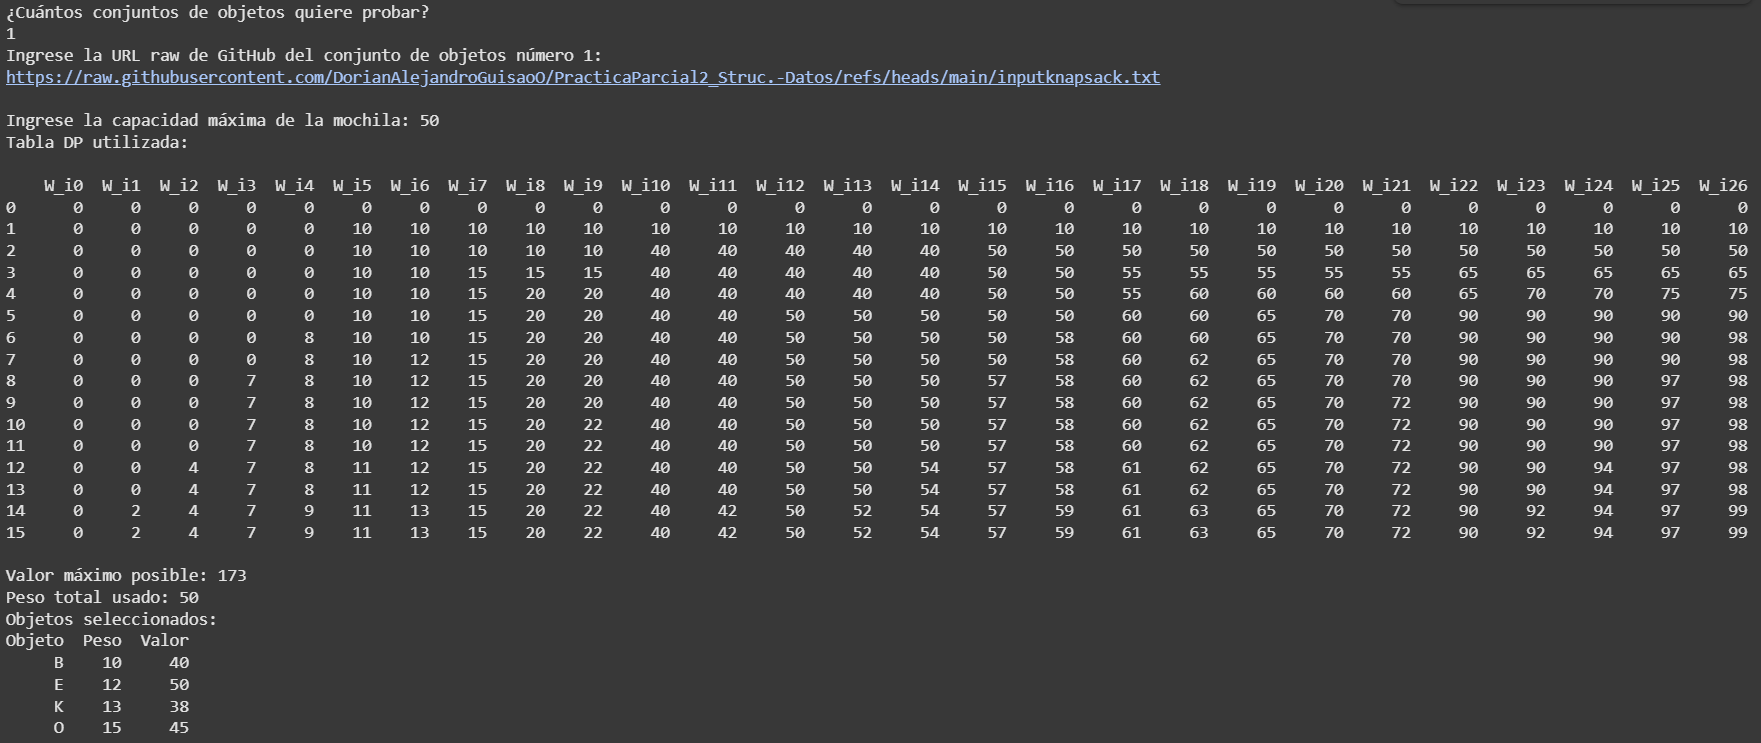

2. Prueba con los conjuntos de objetos del ejemplo visto en clase:

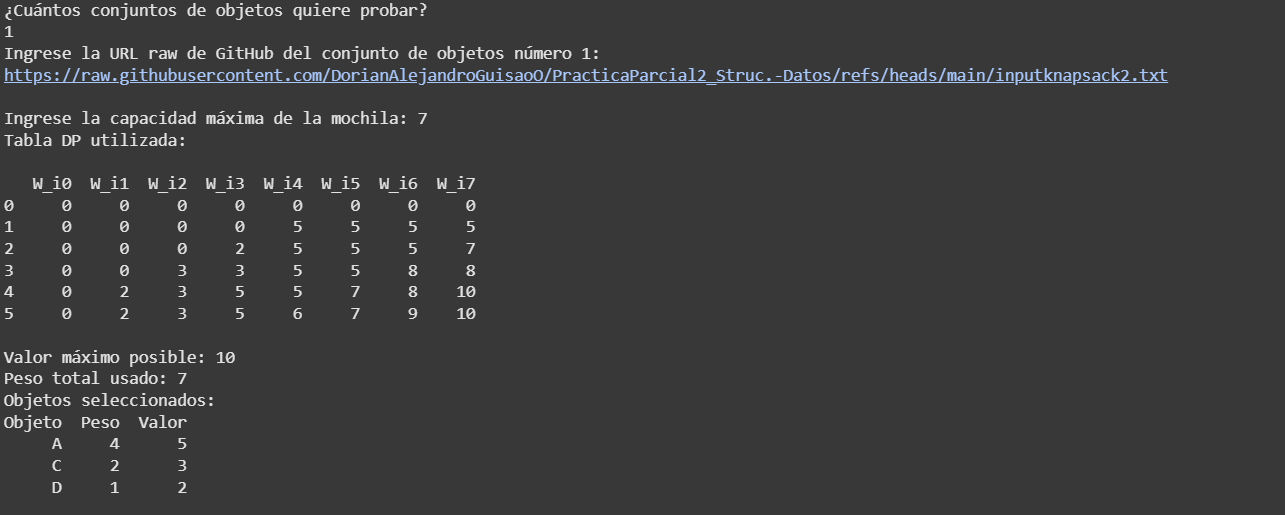

# **Referencias.**

- Abdul Bari. (2018, 20 de febrero). 4.5 0/1 Knapsack - Two Methods - Dynamic Programming [Video]. YouTube. https://www.youtube.com/watch?v=nLmhmB6NzcM
- J. Erickson, Algorithms. Champaign, IL: Independent, 2019.
- ChatGPT, OpenAI (2025). Ayuda con preguntas teóricas y dubugging del código.
